In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.animation as animation
# This is how we can import src module from sibling module
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path: sys.path.append(nb_dir)
#######################
from src import wdata
from netCDF4 import Dataset
# import seaborn as sns;
# %matplotlib nbagg

def animate(images):
    """ need to keep a reference to returned object for the animation to work!"""
    fig = plt.figure()
    ims = []
    for n,i in enumerate(images):
        ims.append([plt.imshow(i, Animated=True, cmap='gray', origin='lower')])
    return animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                    repeat_delay=1000)

# A time-lapse through all 2017 radar images:

In [ ]:
# takes some time
# Todo: make it faster
# %matplotlib nbagg
imgs2017 = [i for mo in [7,8,9] for i in wdata.Radar.getMonth(2017,mo)]
ani = animate([i[1] for i in imgs2017])

# Average Rainfall

In [ ]:
y2017 = reduce(lambda x,y: x + y, [i[1] for i in imgs2017], np.zeros((126,201)))
plt.figure()
plt.imshow(y2017/len(y2017), origin='lower', cmap='Blues')
# ax = sns.heatmap(y2017/len(y2017), cmap='gray', vmin=0, vmax=1)
# ax.invert_yaxis()
# plt.show()

# Day-to-day Rainfall

In [ ]:
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def rainfallDaily(year, month):
    days = map(lambda (hr, x): (hr[:-3], x), wdata.Radar.getMonth(year, month))
    days_rainfall = {k:0.0 for k in set([i[0] for i in days])}
    for (k,v) in days:
        days_rainfall[k] += np.sum(v) 
    xs = sorted(map(lambda x: int(x[-2:]), days_rainfall.keys()))
    ys = [days_rainfall['{:0>2d}-{:0>2d}-{:0>2d}'.format(year, month, i)] for i in xs]
    m, b = np.polyfit(xs, ys, 1) 
    plt.figure()
    plt.title('Daily Rainfall for {:s}, {:0>2d}'.format(MONTHS[month-1], year))
    plt.xlabel('Day')
    plt.ylabel('Rainfall(mm)')
    plt.plot(xs, ys)
    plt.scatter(xs, ys)
    plt.plot([-10, 100],[-10*m+b, 100*m+b])
    plt.xlim(0,32)
    plt.show()

rainfallDaily(2017, 6)
rainfallDaily(2017, 12)

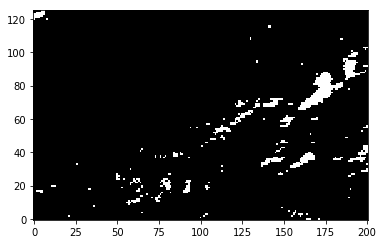

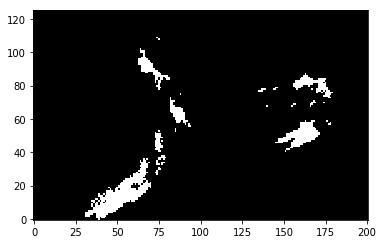

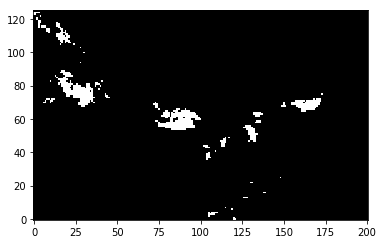

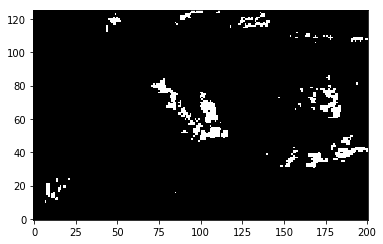

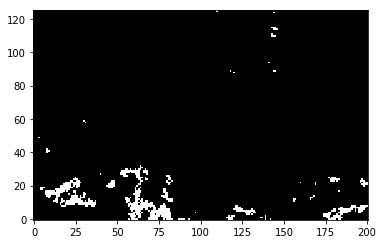

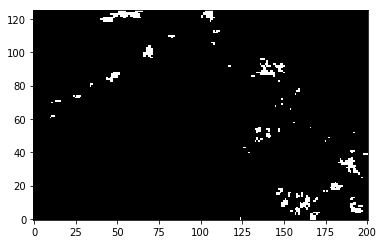

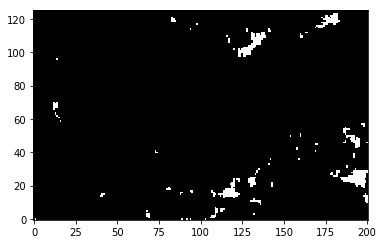

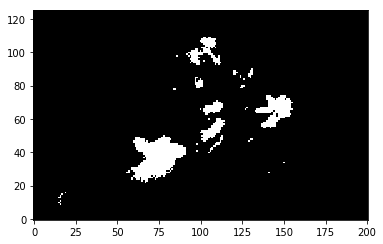

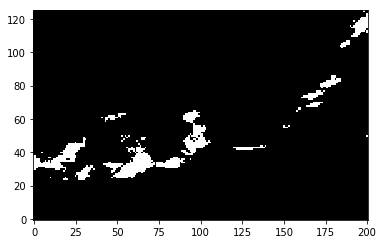

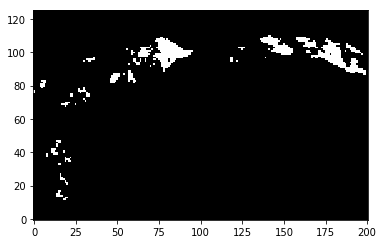

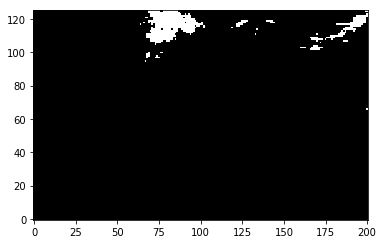

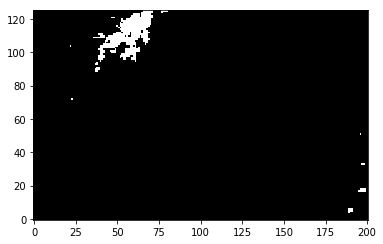

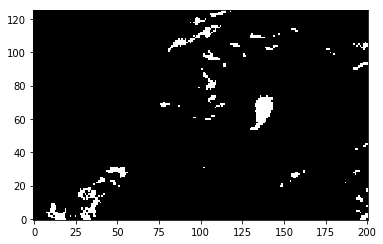

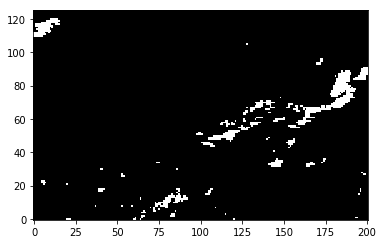

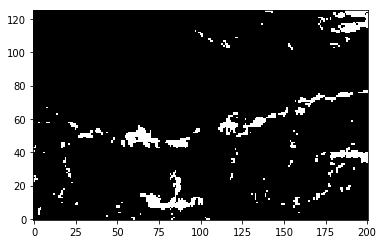

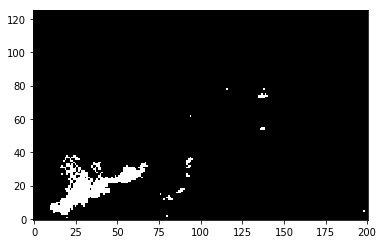

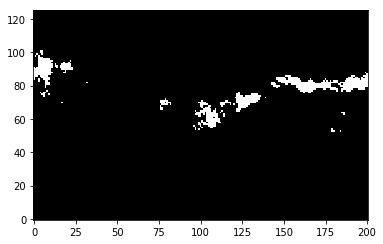

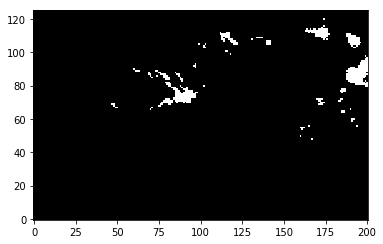

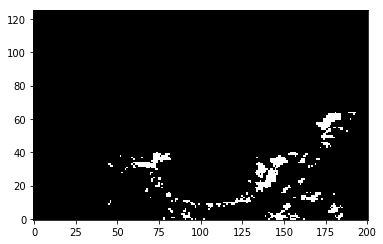

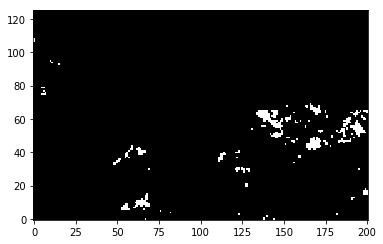

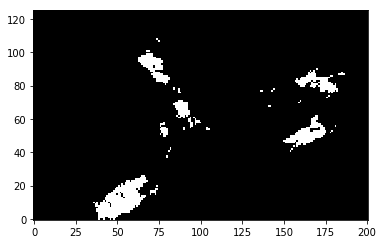

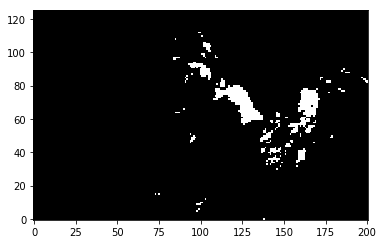

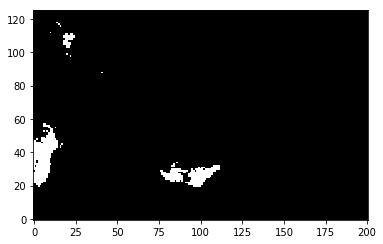

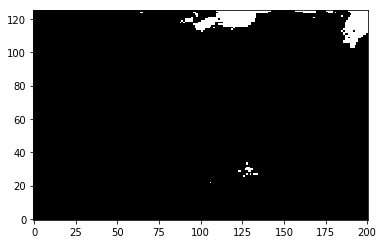

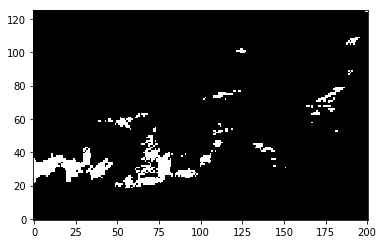

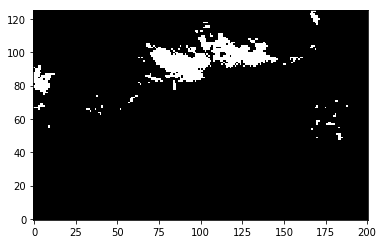

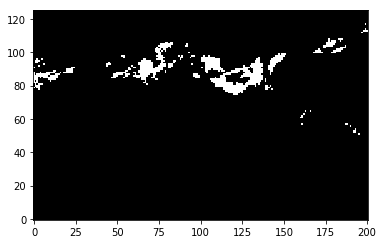

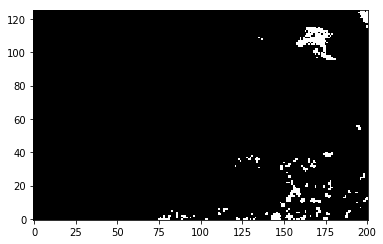

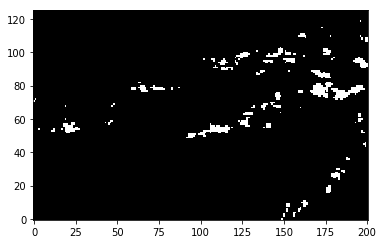

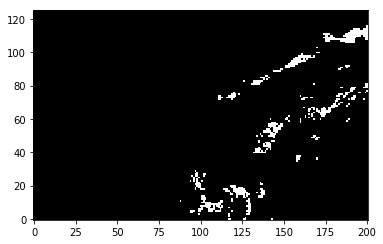

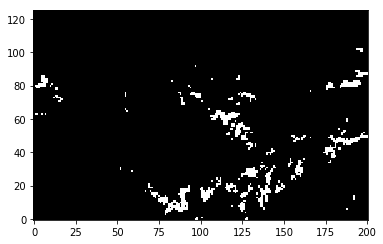

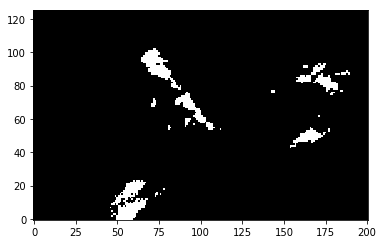

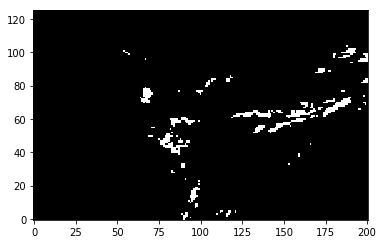

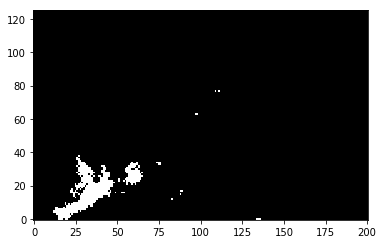

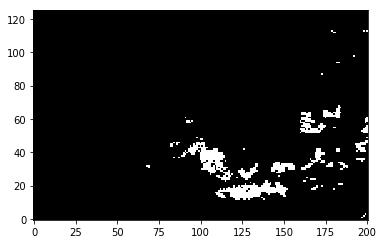

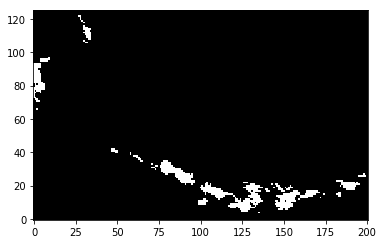

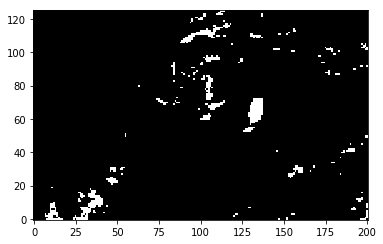

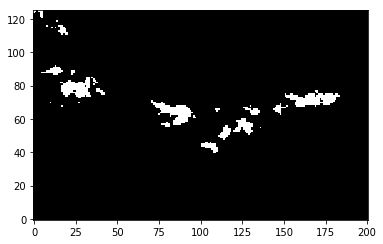

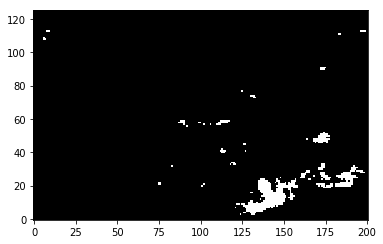

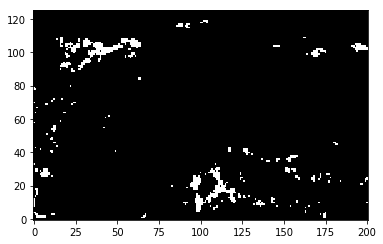

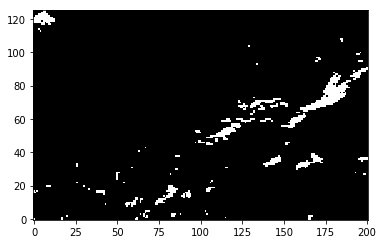

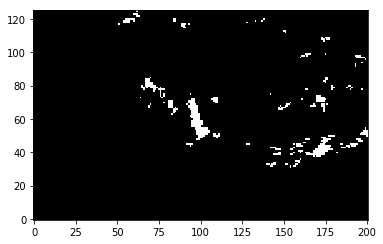

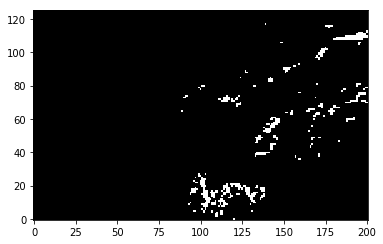

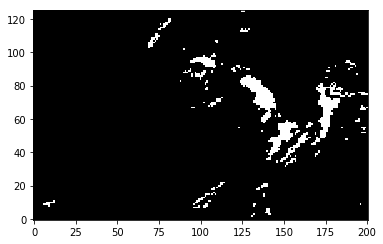

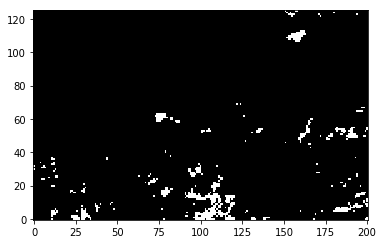

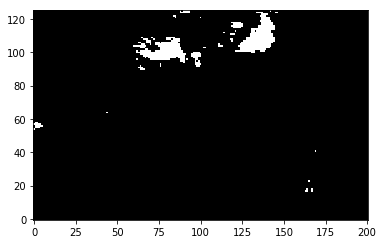

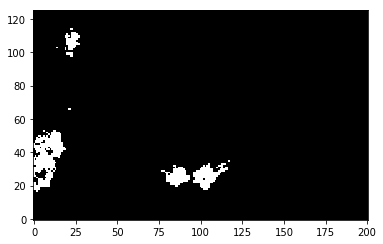

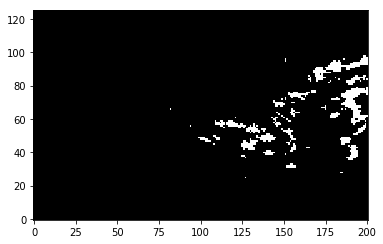

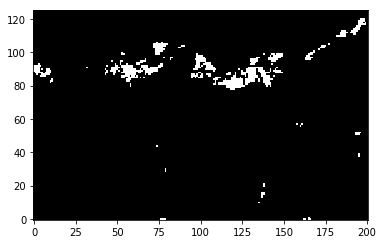

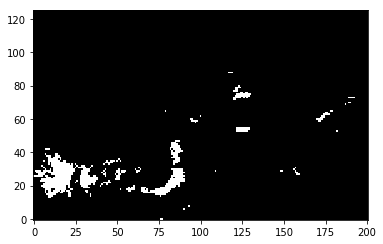

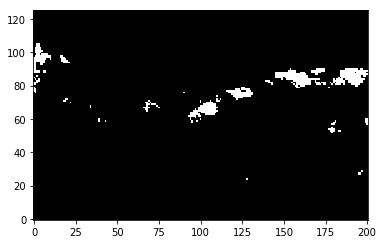

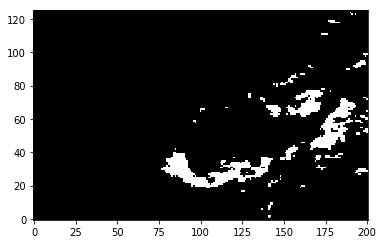

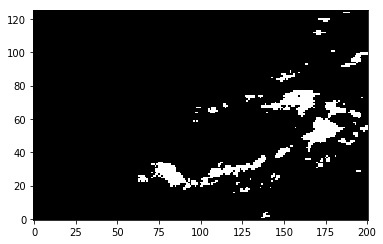

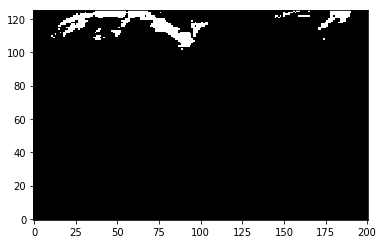

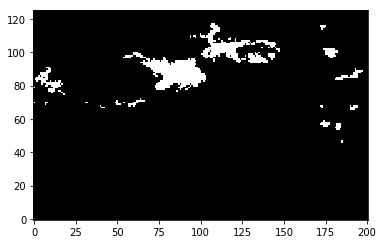

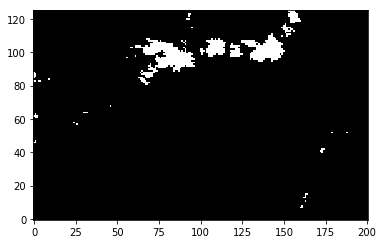

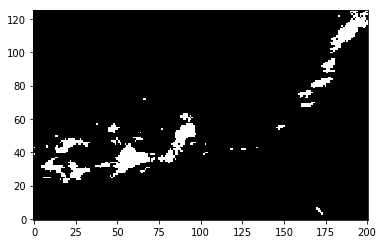

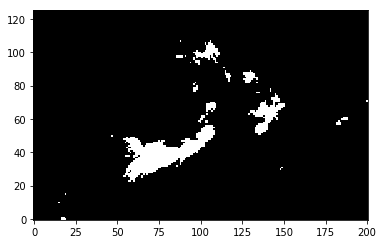

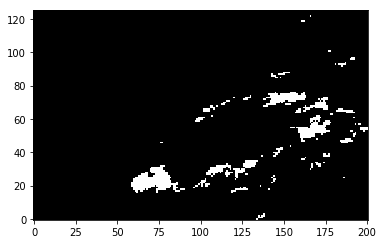

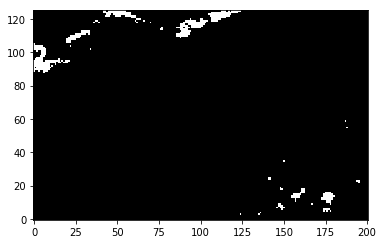

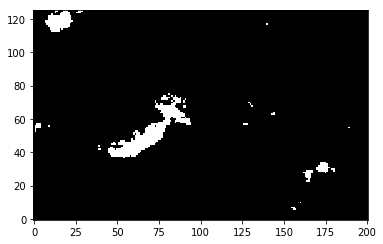

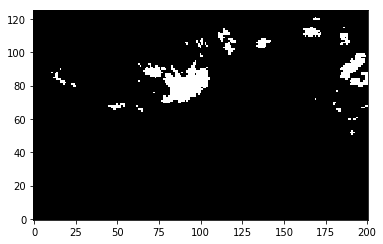

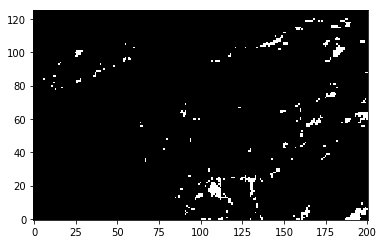

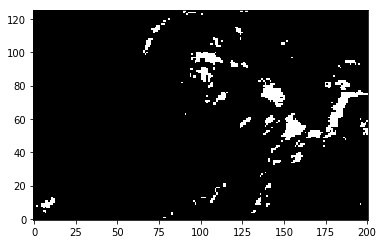

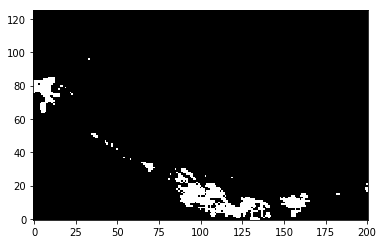

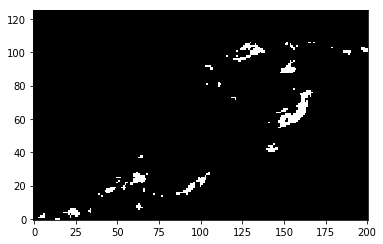

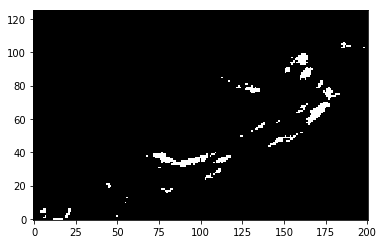

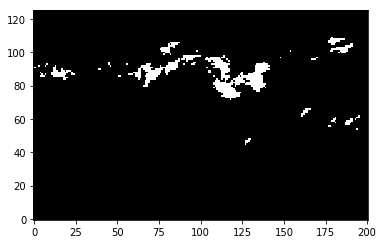

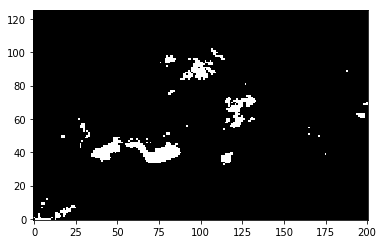

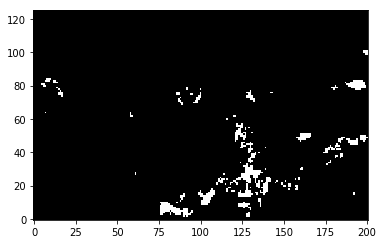

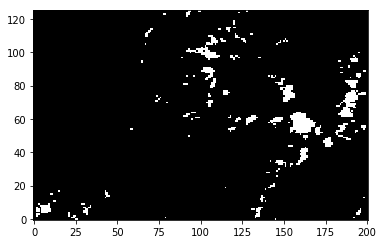

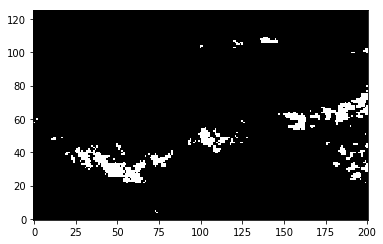

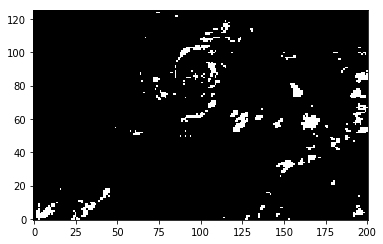

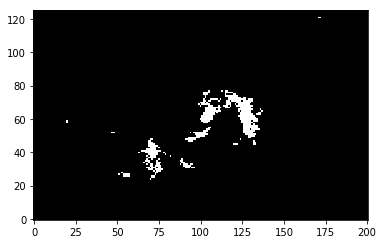

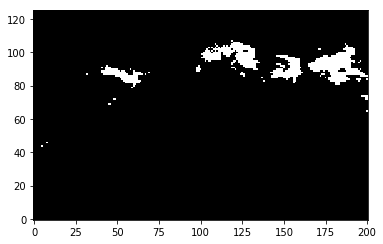

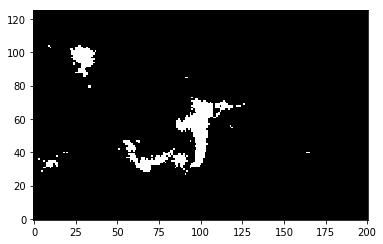

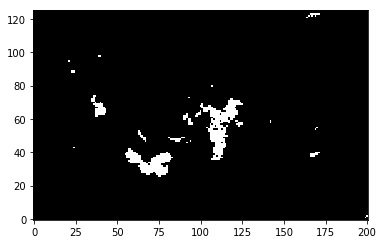

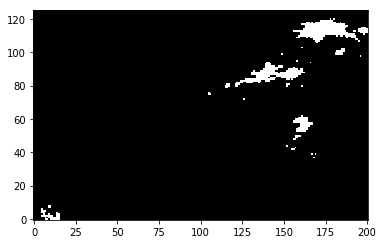

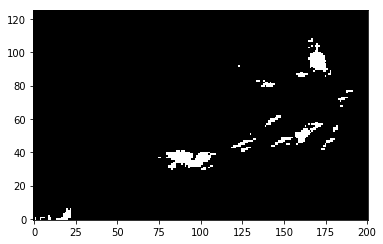

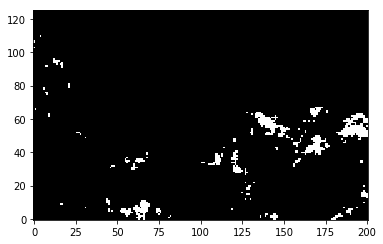

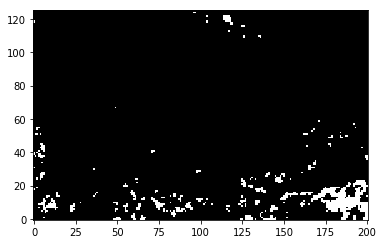

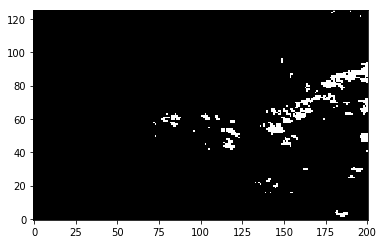

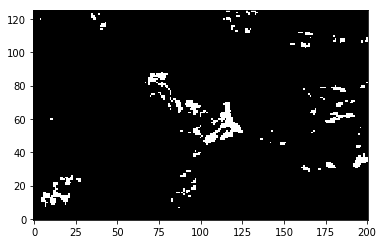

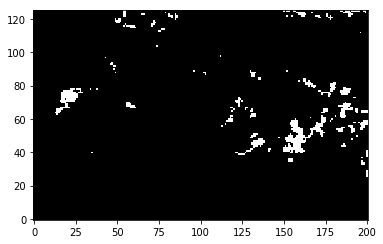

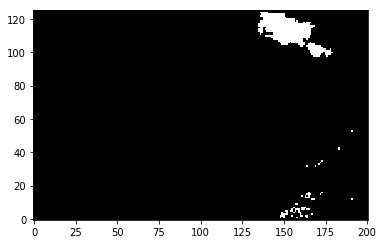

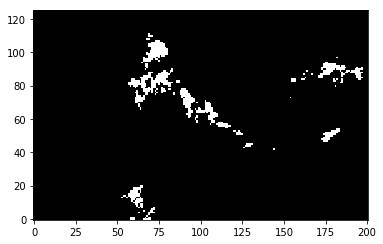

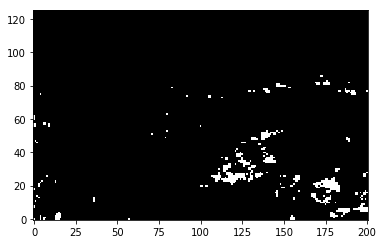

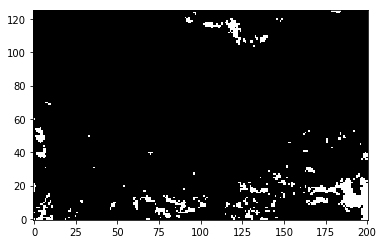

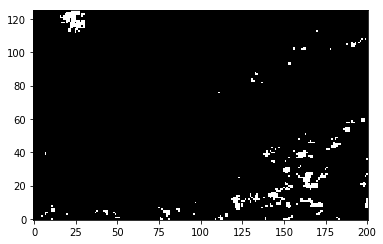

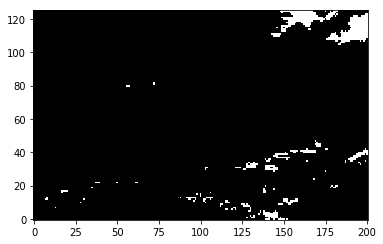

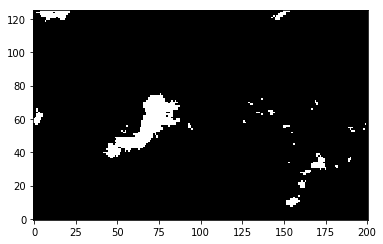

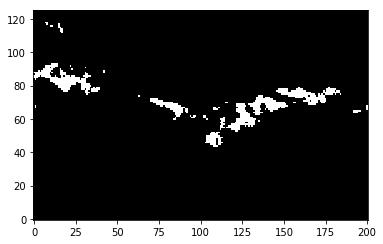

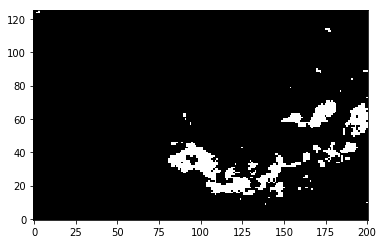

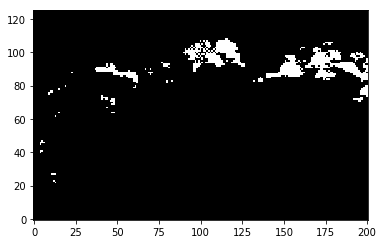

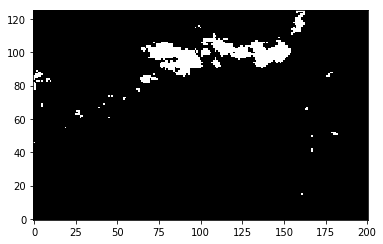

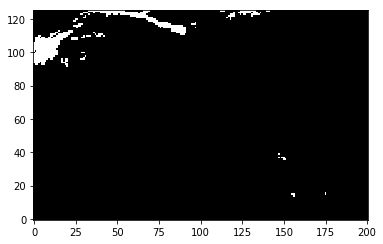

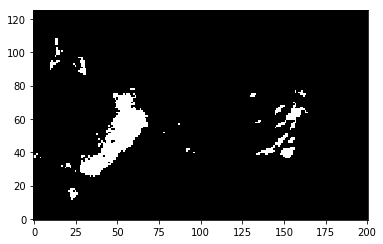

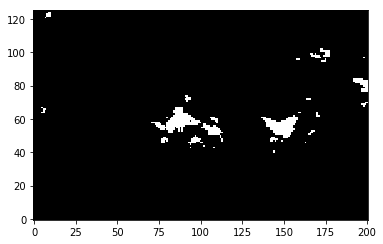

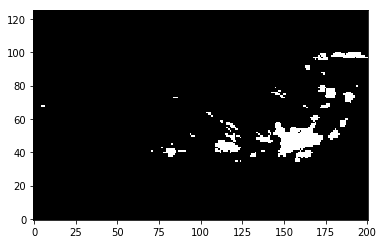

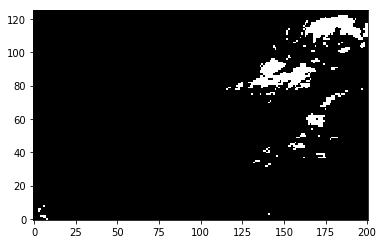

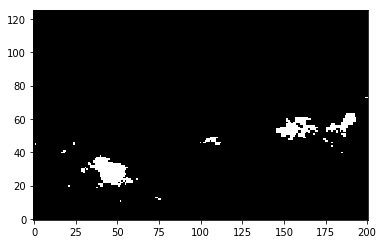

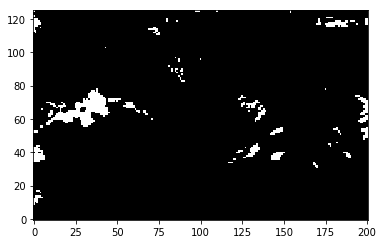

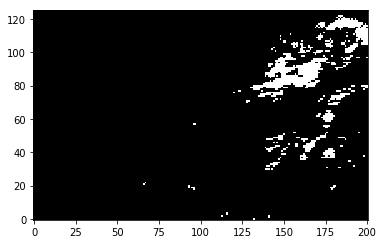

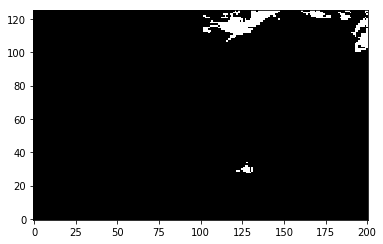

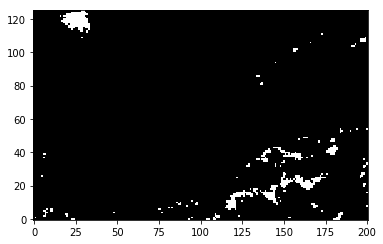

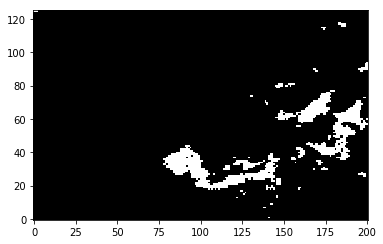

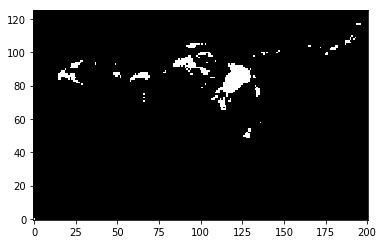

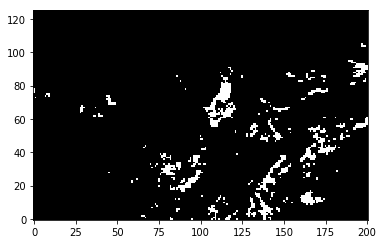

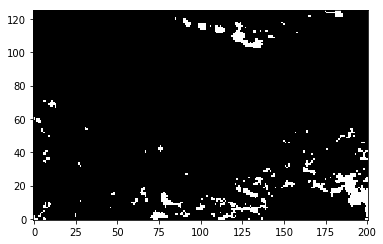

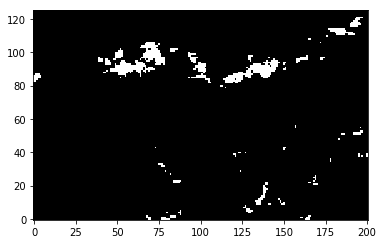

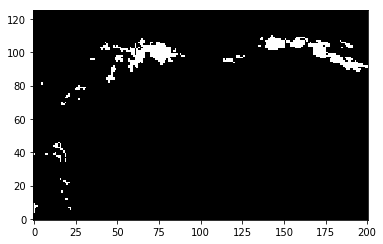

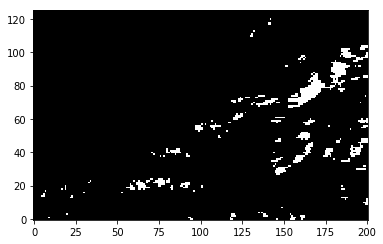

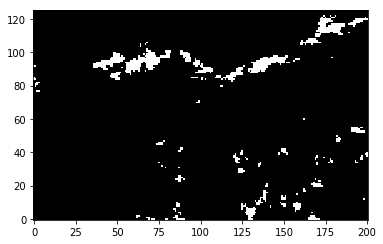

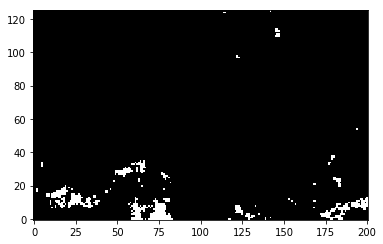

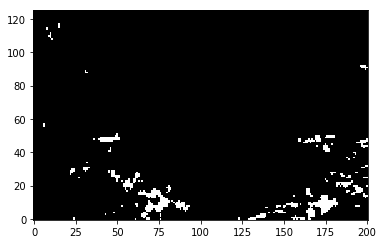

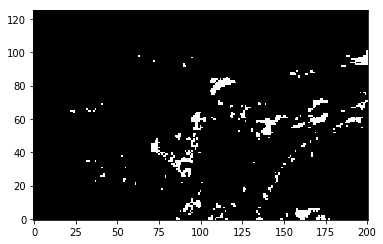

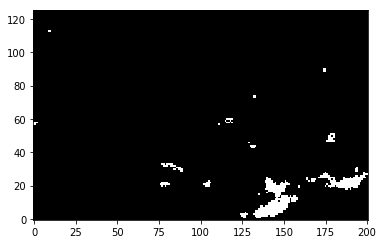

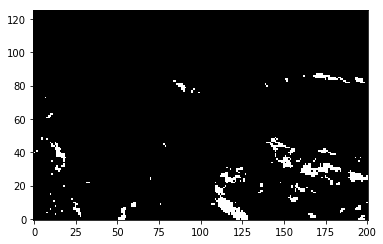

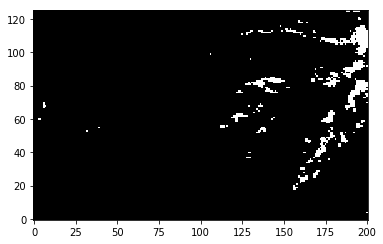

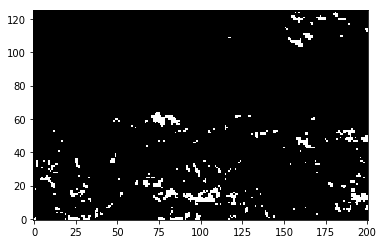

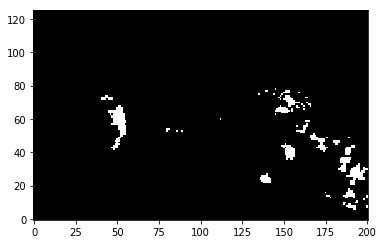

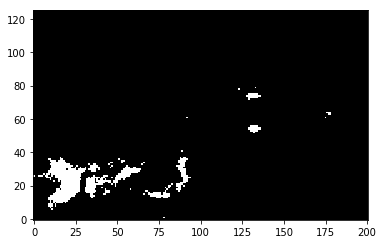

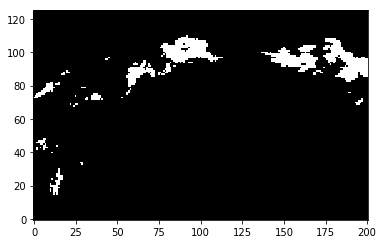

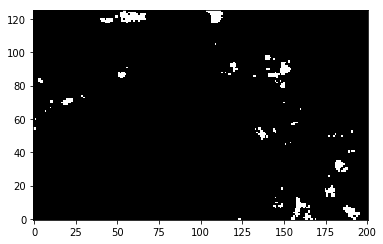

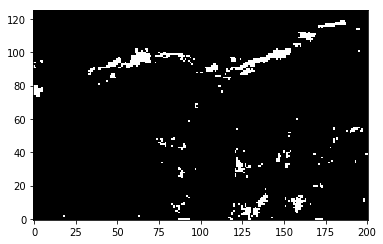

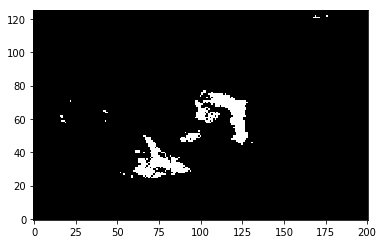

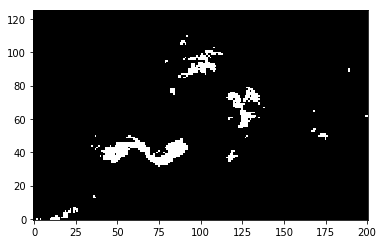

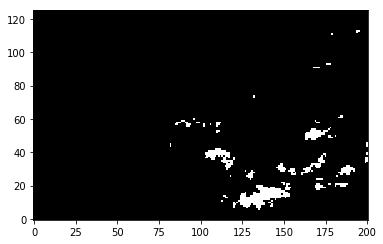

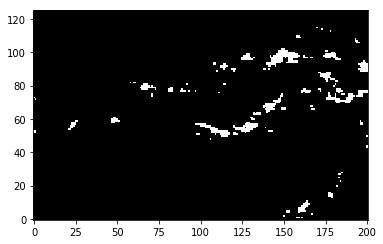

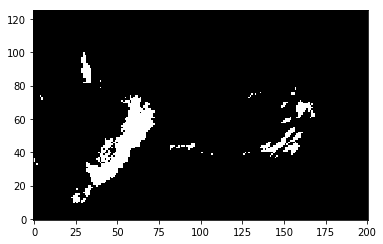

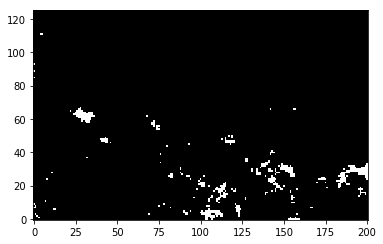

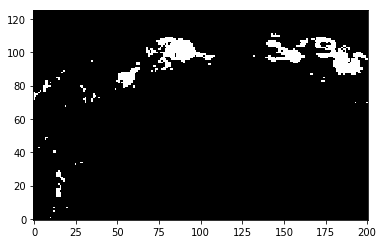

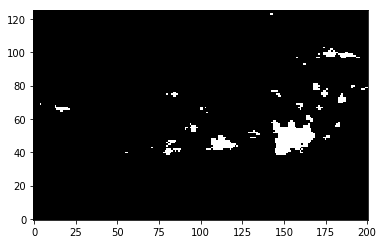

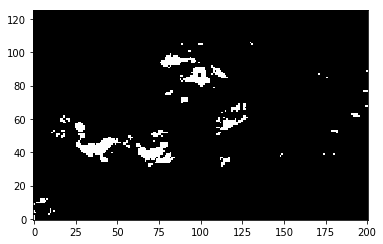

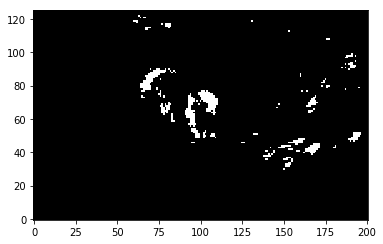

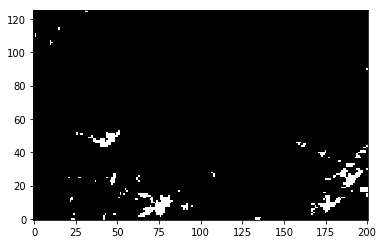

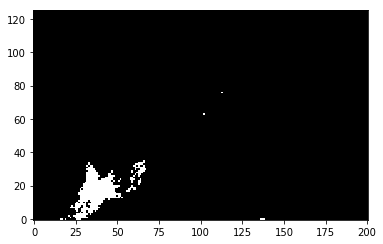

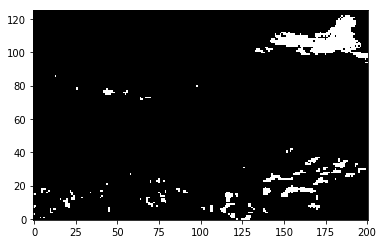

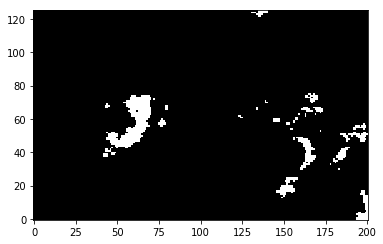

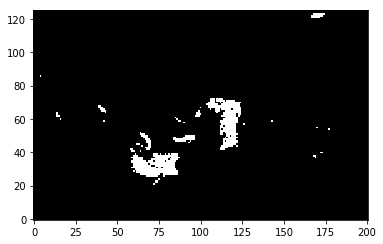

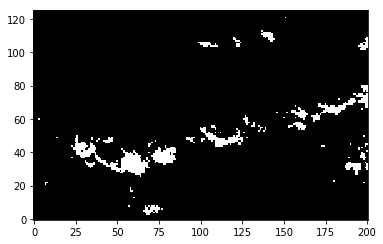

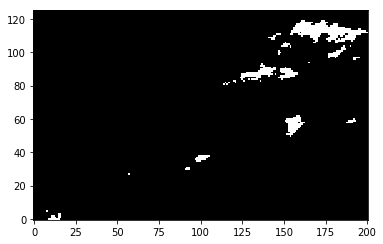

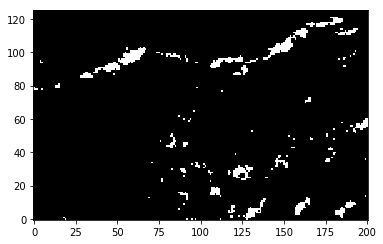

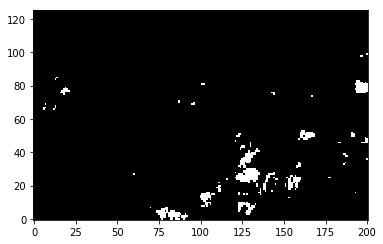

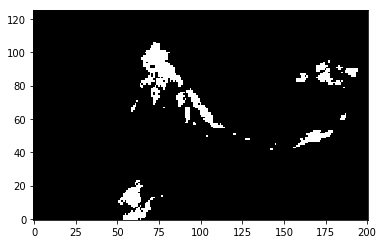

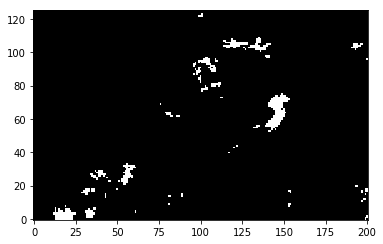

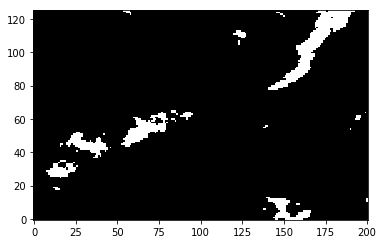

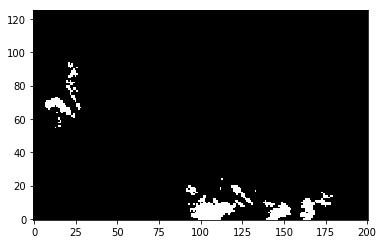

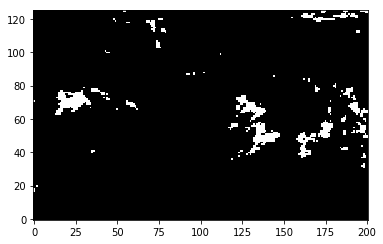

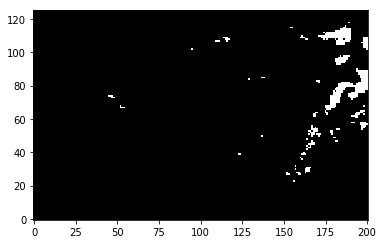

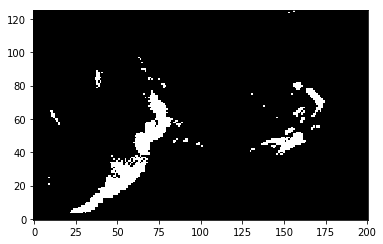

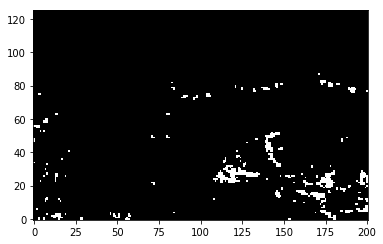

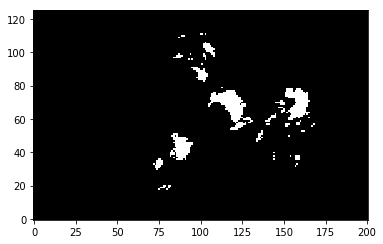

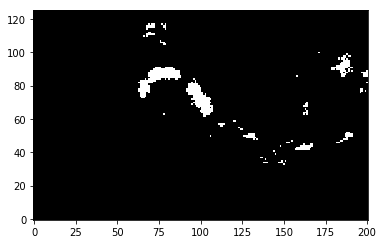

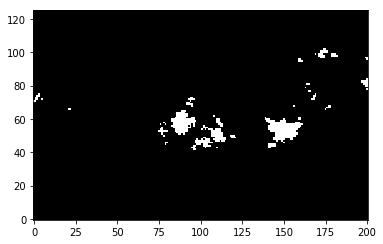

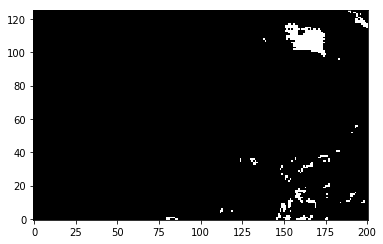

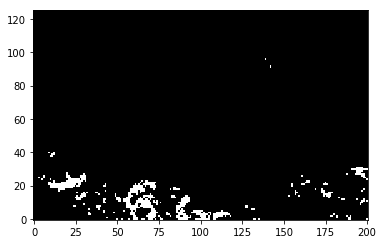

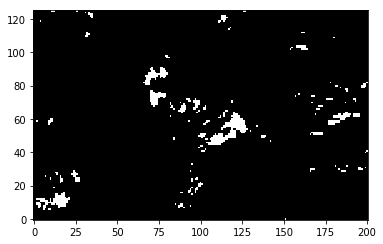

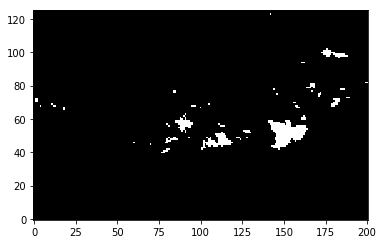

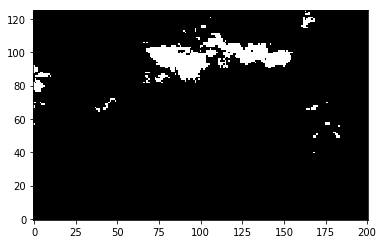

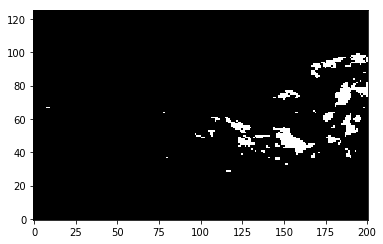

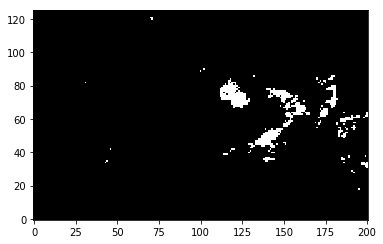

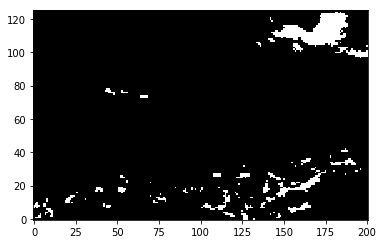

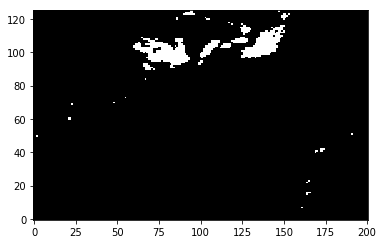

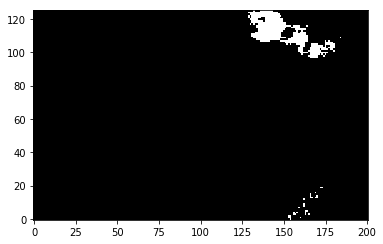

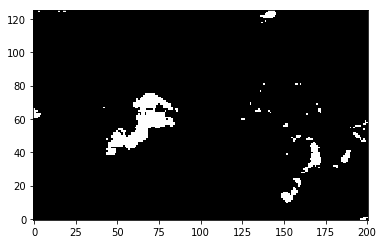

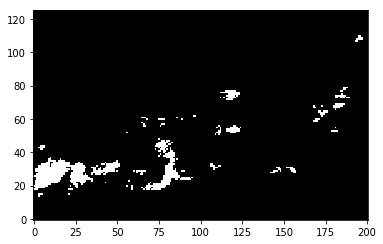

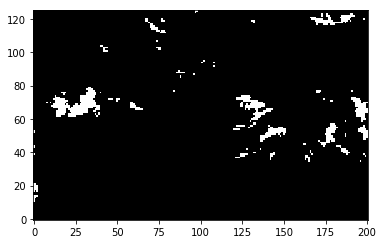

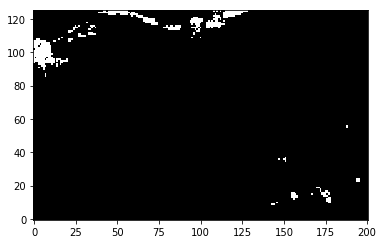

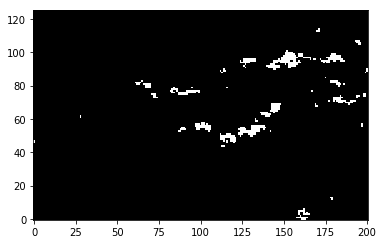

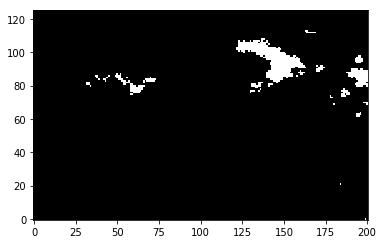

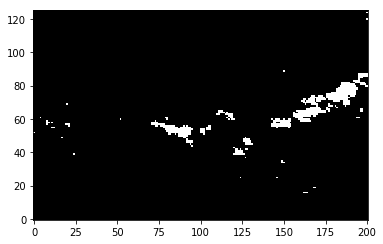

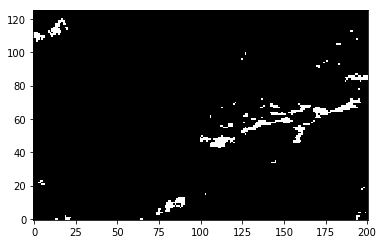

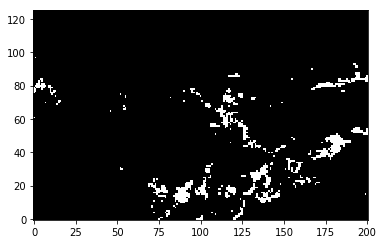

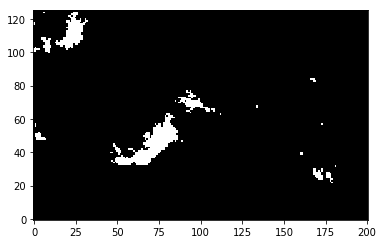

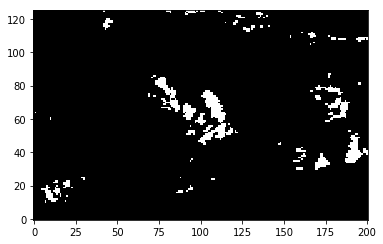

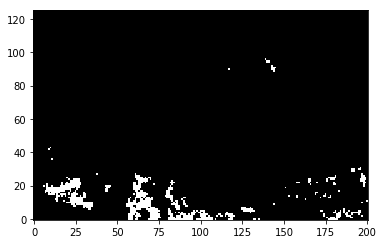

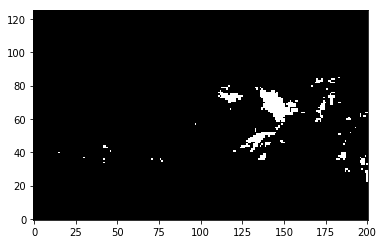

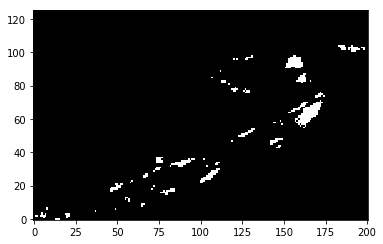

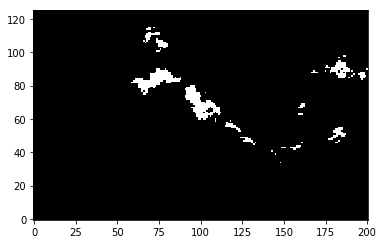

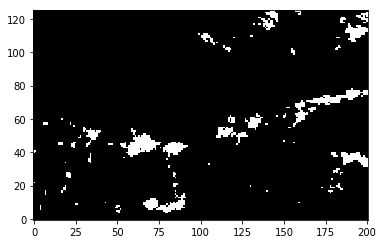

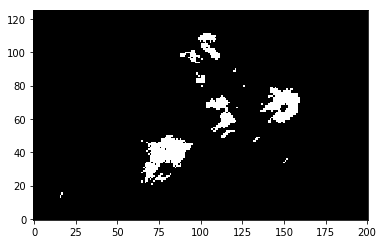

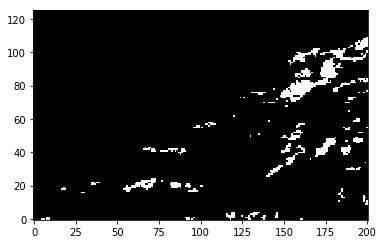

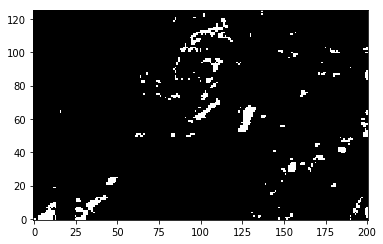

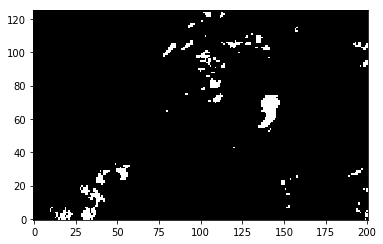

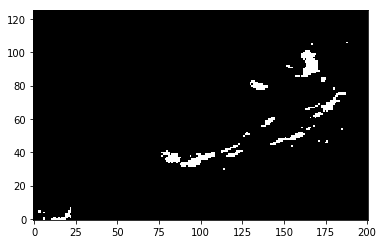

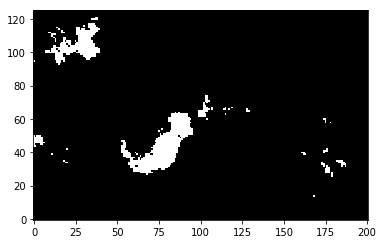

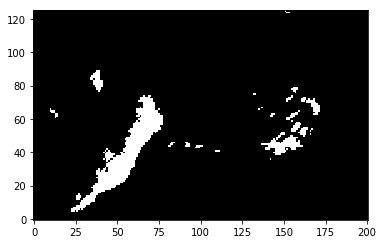

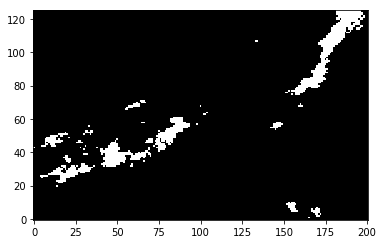

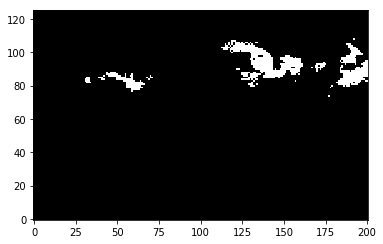

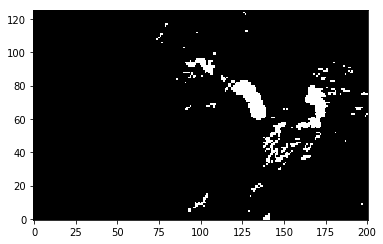

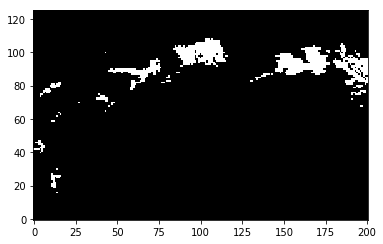

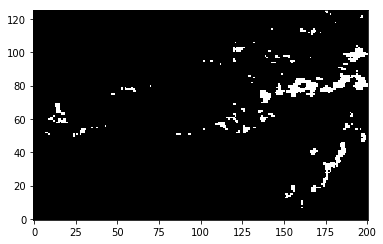

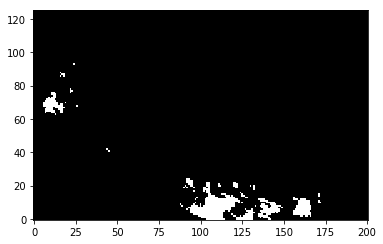

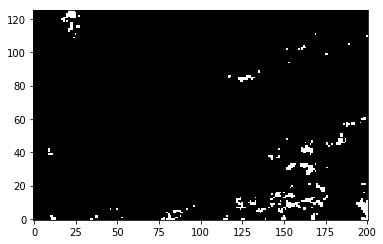

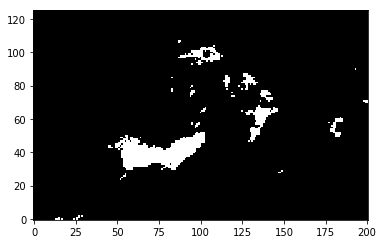

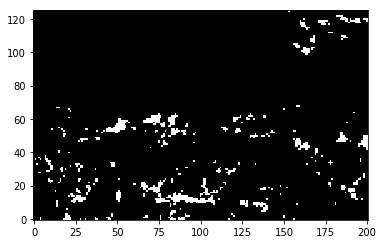

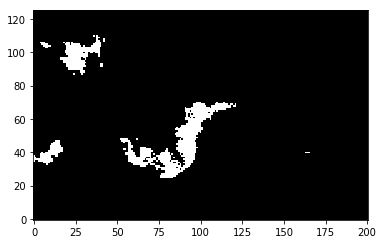

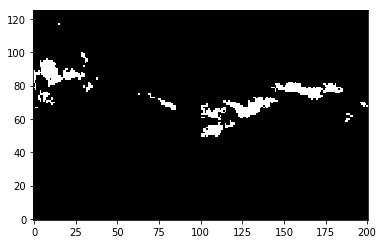

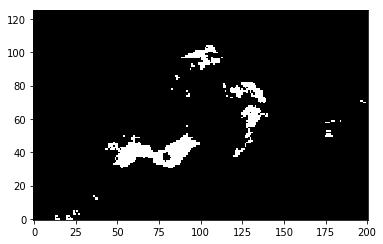

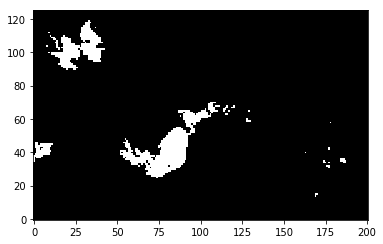

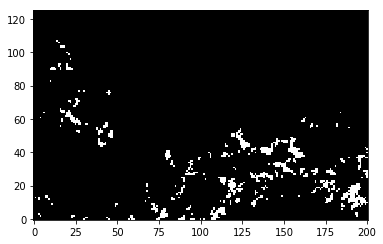

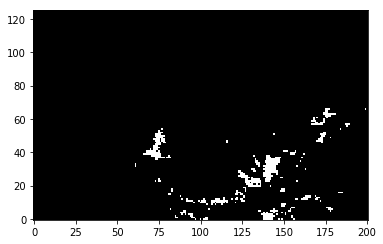

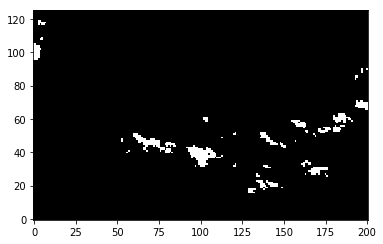

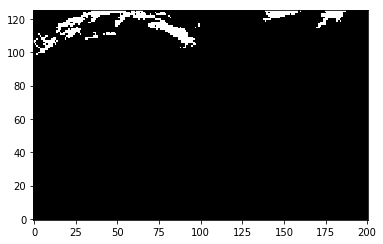

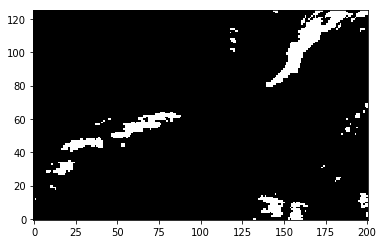

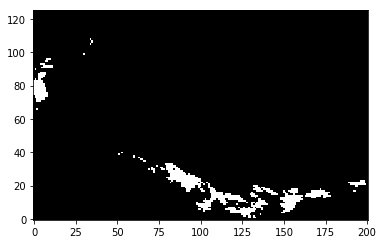

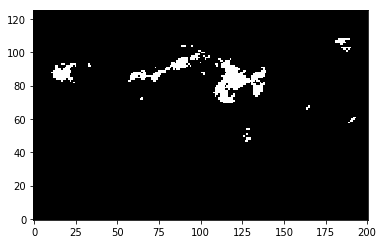

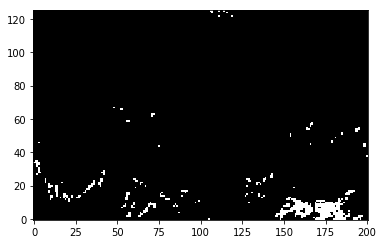

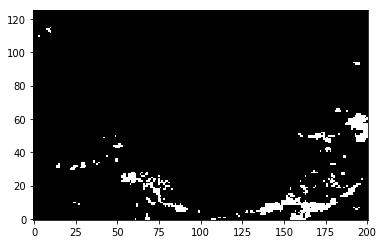

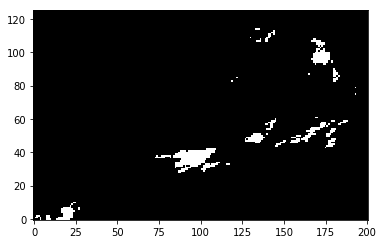

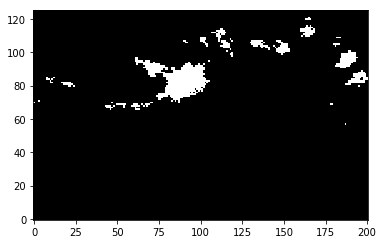

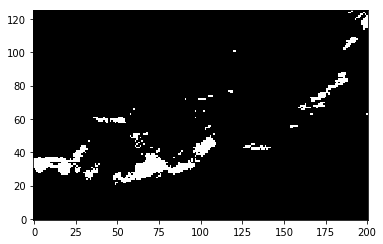

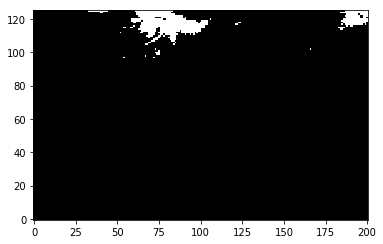

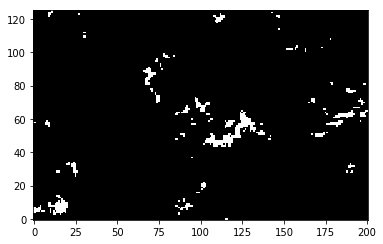

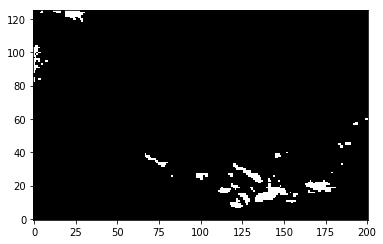

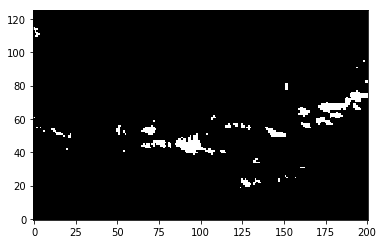

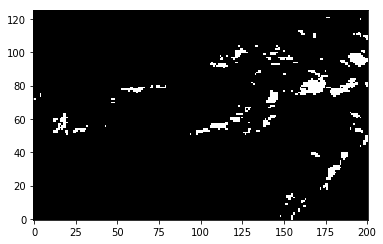

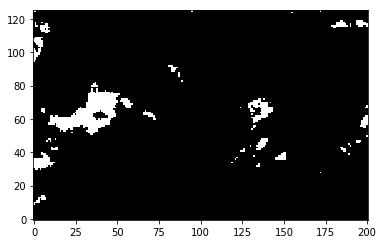

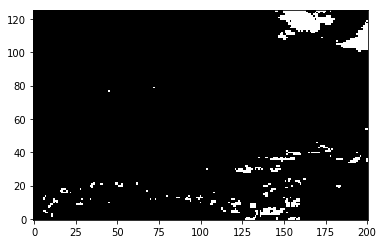

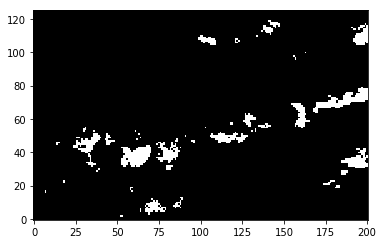

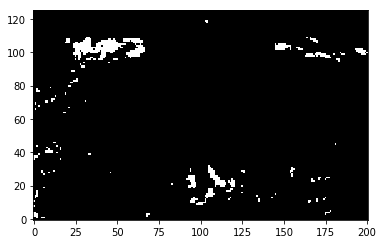

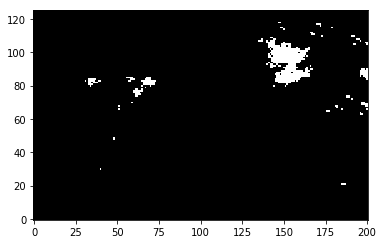

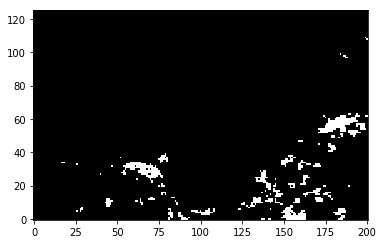

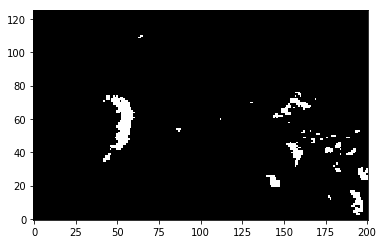

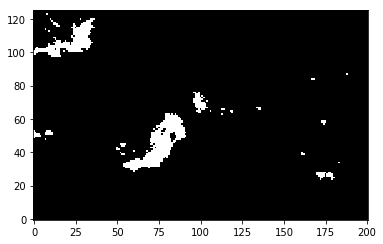

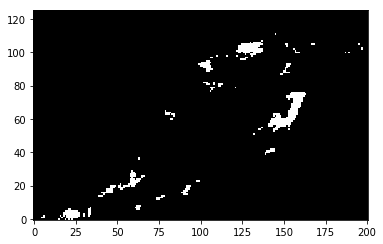

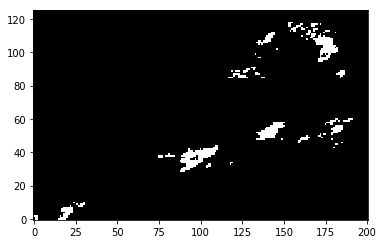

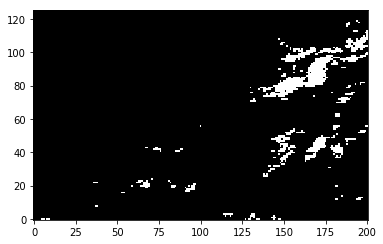

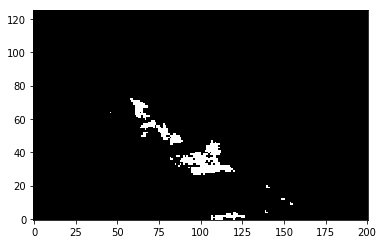

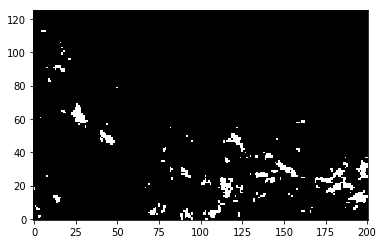

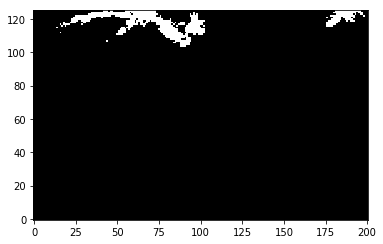

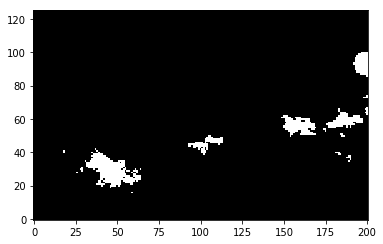

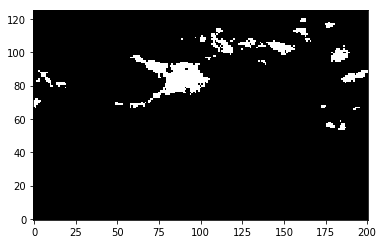

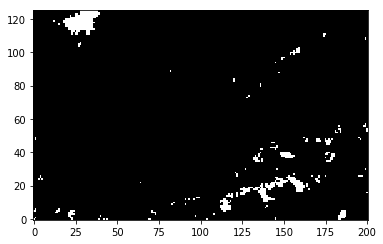

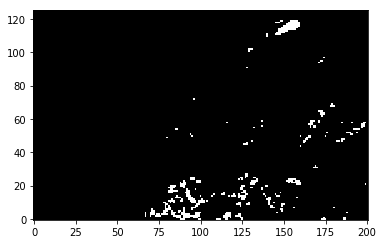

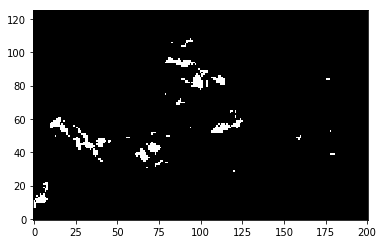

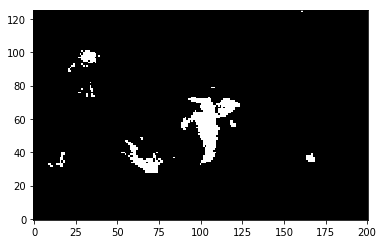

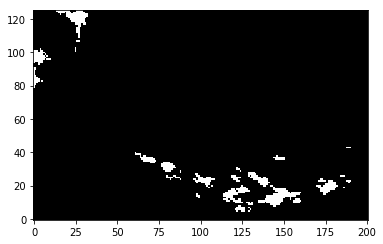

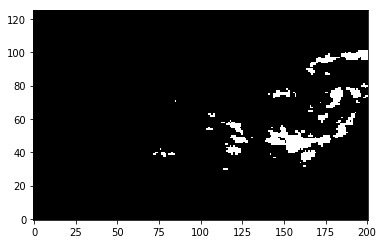

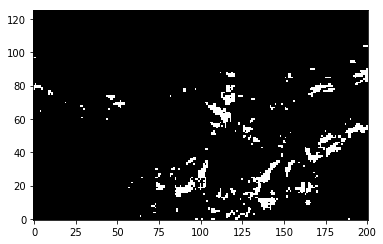

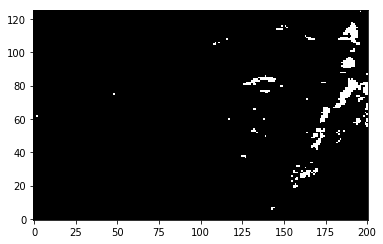

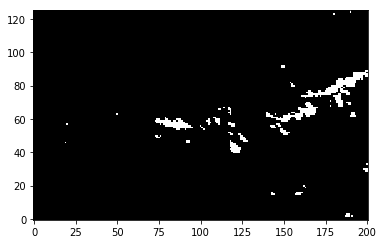

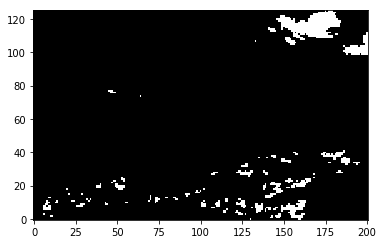

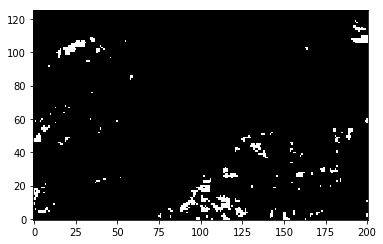

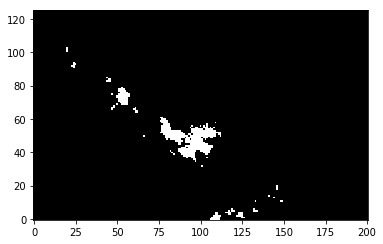

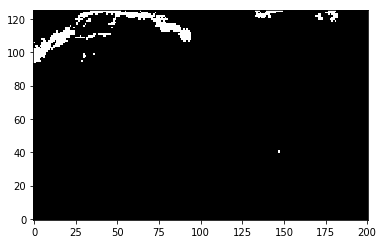

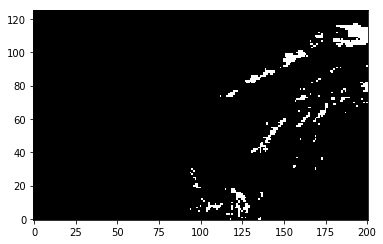

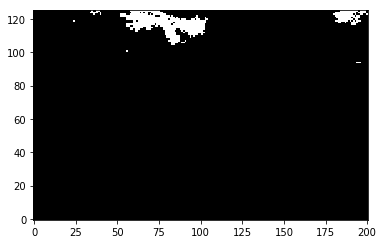

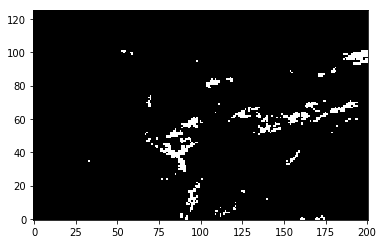

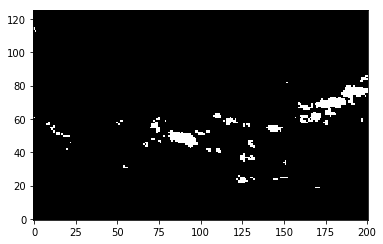

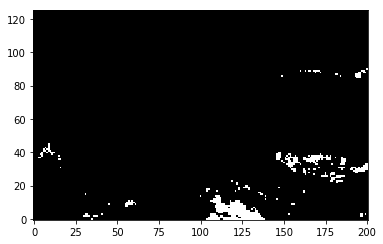

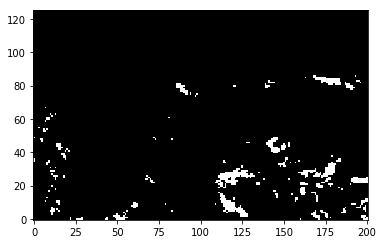

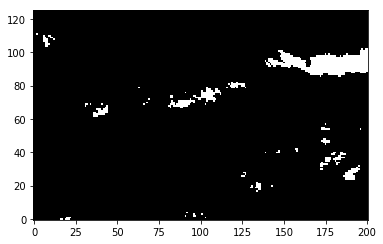

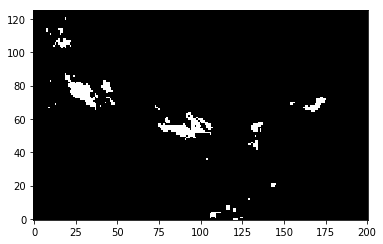

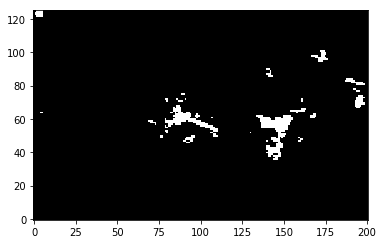

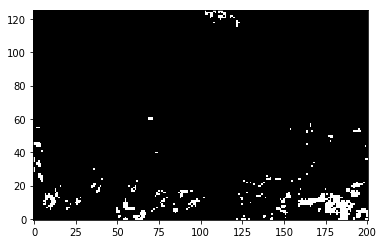

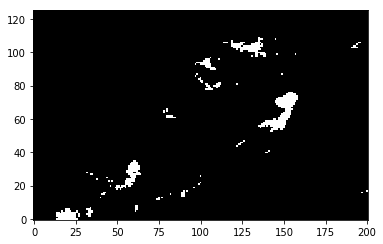

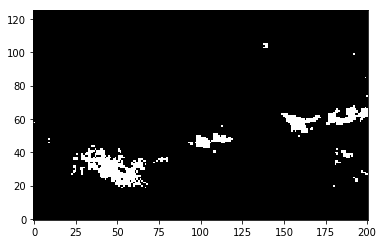

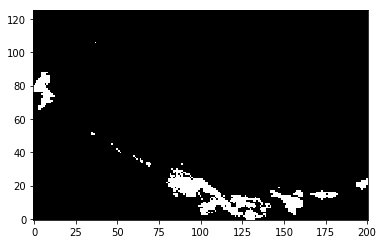

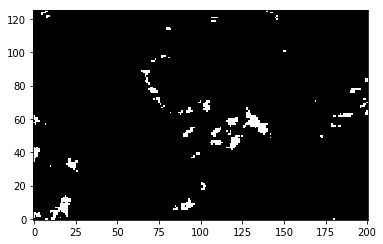

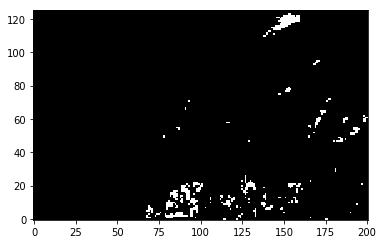

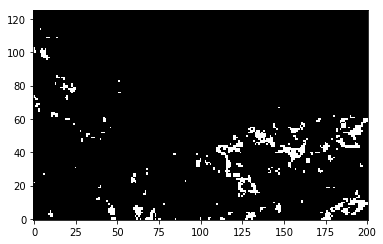

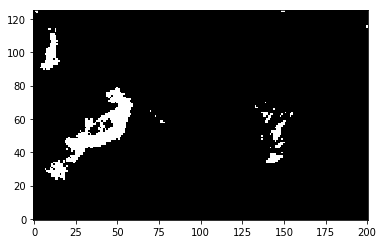

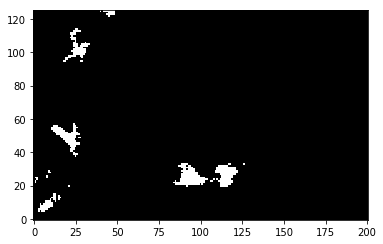

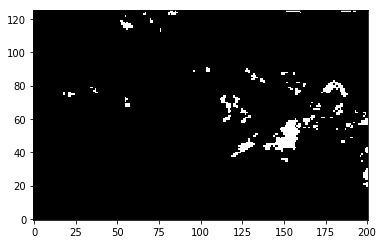

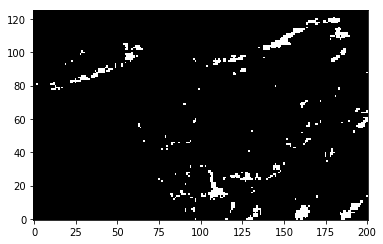

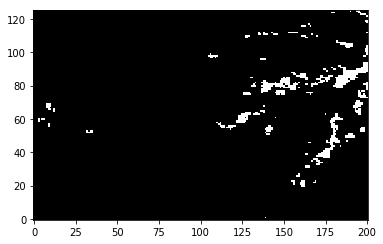

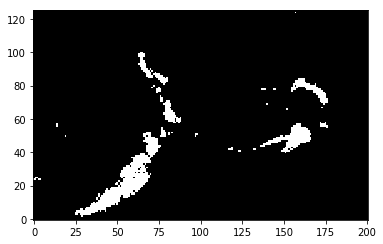

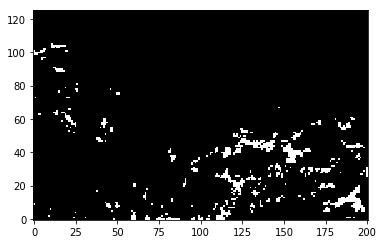

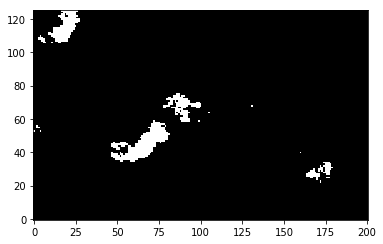

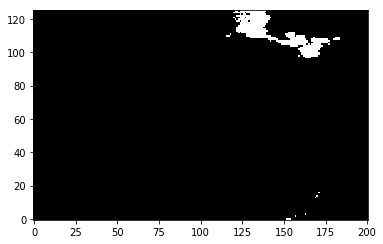

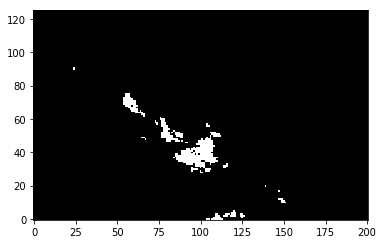

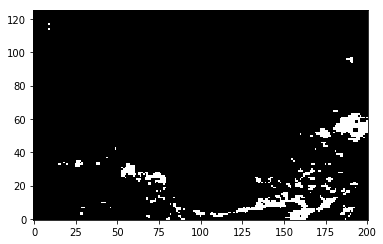

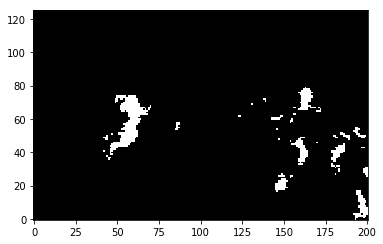

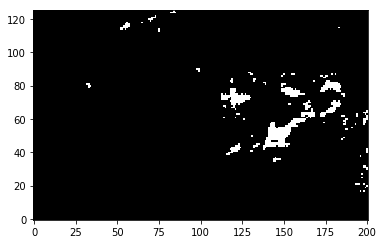

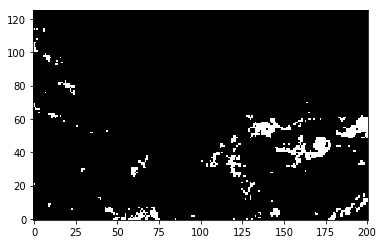

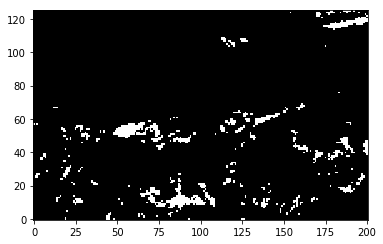

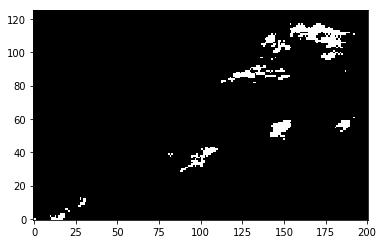

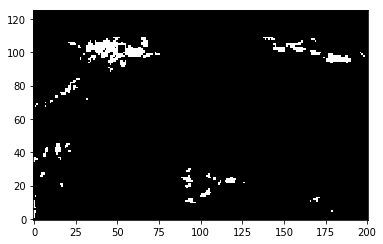

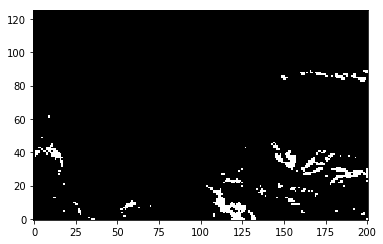

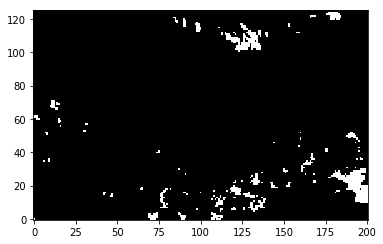

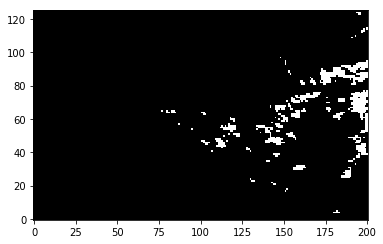

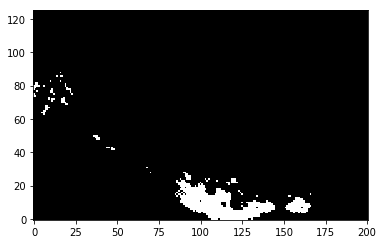

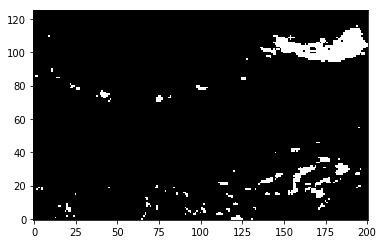

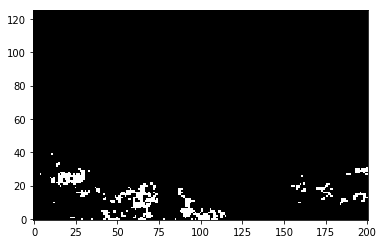

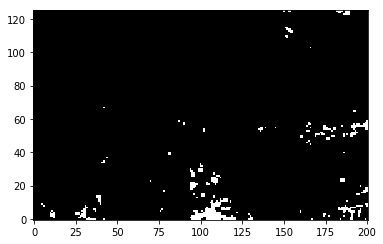

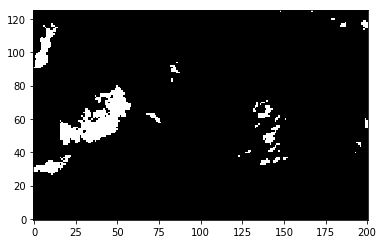

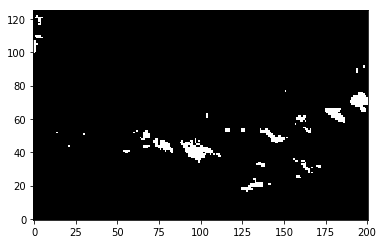

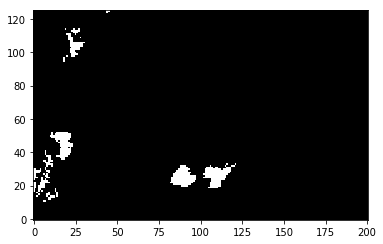

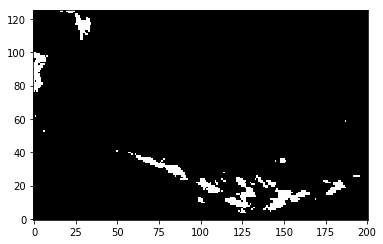

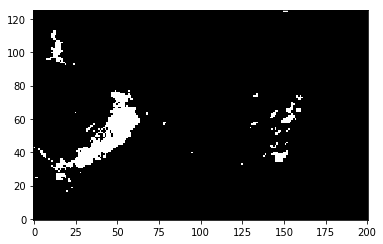

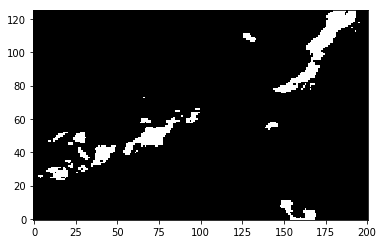

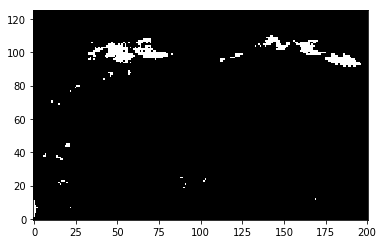

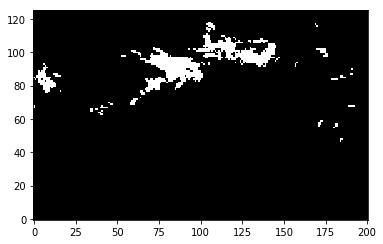

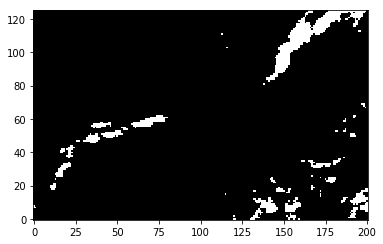

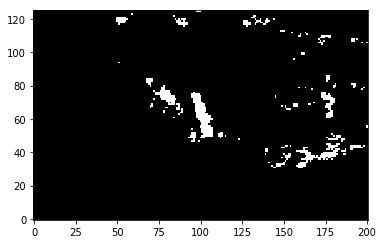

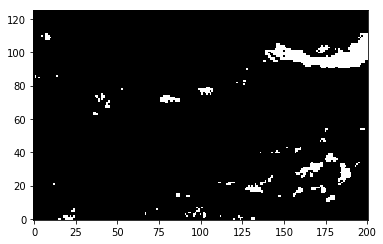

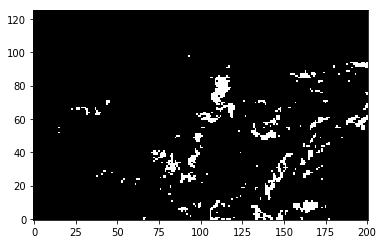

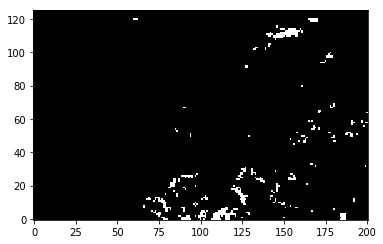

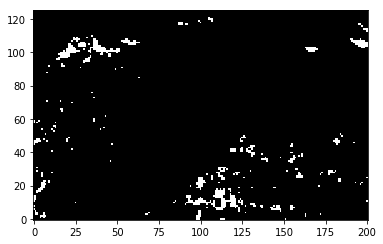

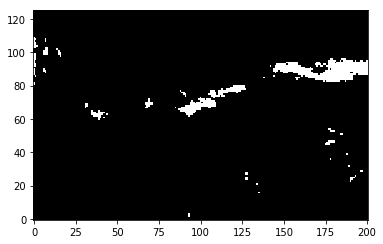

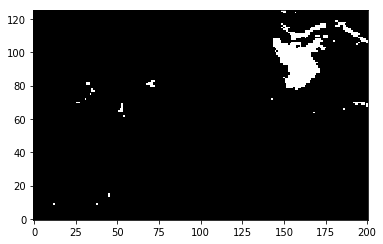

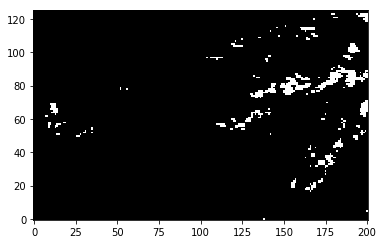

In [18]:
wdata.Radar.minmax = [0,30]
testmon = wdata.Radar.getMonth(2017,7)
np.random.shuffle(testmon)
imavgs = []
count = 0
for tup in testmon:
    shape = tup[1].shape
    imavg = np.sum(tup[1])*1.0/(shape[0]*shape[1])
    if imavg > 0.02:
        count += 1
        plt.figure()
        plt.imshow(tup[1], origin='lower', cmap='gray')
#     imavgs.append(imavg)
    
# plt.plot(imavgs)
plt.show()

In [19]:
print count,'/', len(testmon),'=', count*100.0/len(testmon)

304 / 742 = 40.9703504043


In [10]:
def getSatFromRad((radtime, radimg), band, whichHalfHr=0):
        """
            Given a specific radar hour, get the corrosponding Satellite file of target band.
            This will return the first halfhour by default (i.e goes13.yyyy.dd.hh15ss.BAND_band.nc),
            to use the 2nd halfhour instead pass in: whichHalfHr=1
            Return: corrosponding netcdf dataset or None if none exist in Satellite data 
        """
        toks = radtime.split('-')
        print toks
        m, h = int(toks[1]), int(radtime[-2:])
        y, d = int(toks[0]), int(toks[2][:2])
        return wdata.Sat.getHalfHr(y, m, d, h, whichHalfHr, band)
getSatFromRad(wdata.Radar.getMonth(2017,7)[0], 2)

['2017', '07', '01.00']


<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    Source: McIDAS Area File
    Satellite Sensor: G-13 IMG    
    dimensions(sizes): xc(200), yc(52), time(1), auditCount(2), auditSize(80)
    variables(dimensions): int32 version(), int32 sensorID(), int32 imageDate(), int32 imageTime(), int32 startLine(), int32 startElem(), int32 time(time), int32 dataWidth(), int32 lineRes(), int32 elemRes(), int32 prefixSize(), int32 crDate(), int32 crTime(), int32 bands(), |S1 auditTrail(auditCount,auditSize), float32 data(time,yc,xc), float32 lat(yc,xc), float32 lon(yc,xc)
    groups: 